In [1]:
from pybaseball import statcast
statcast(start_dt="2019-06-24", end_dt="2019-06-25").columns



This is a large query, it may take a moment to complete


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|██████████████████████████████████████████                                          | 1/2 [00:08<00:08,  8.13s/it]C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch e

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [1]:
# Find Clayton Kershaw's player id
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
playerid_lookup('kershaw', 'clayton')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,kershaw,clayton,477132,kersc001,kershcl01,2036,2008.0,2023.0


In [2]:
# His MLBAM ID is 477132, so we feed that as the player_id argument to the following function 
kershaw_stats = statcast_pitcher('2017-06-01', '2017-07-01', 477132)
kershaw_stats.groupby("pitch_type").release_speed.agg("mean")

Gathering Player Data


pitch_type
CH    86.725000
CU    73.133333
FF    92.844622
SI    94.515385
SL    87.962381
Name: release_speed, dtype: float64

In [3]:
# Find Cliff Lee's player id
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
playerid_lookup('lee', 'cliff')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,lee,cliff,117599,lee-c101,leecl01,1007450,1919.0,1926.0
1,lee,cliff,424324,lee-c003,leecl02,1636,2002.0,2014.0


In [4]:
# Find Aaron Nola's player id
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
playerid_lookup('nola', 'aaron')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,nola,aaron,605400,nolaa001,nolaaa01,16149,2015.0,2023.0


In [5]:
# His MLBAM ID is 605400, so we feed that as the player_id argument to the following function 
nola_stats = statcast_pitcher('2023-06-01', '2023-07-01', 605400)
nola_stats.groupby("pitch_type").release_speed.agg("mean")

Gathering Player Data


pitch_type
CH    85.630645
FC    86.217391
FF    93.427481
KC    79.327957
SI    92.373214
Name: release_speed, dtype: float64

In [6]:
from pybaseball import pitching_stats
data = pitching_stats(2014,2016)
data.columns

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G',
       ...
       'Pit+ FC', 'Stf+ FS', 'Loc+ FS', 'Pit+ FS', 'Stuff+', 'Location+',
       'Pitching+', 'Stf+ FO', 'Loc+ FO', 'Pit+ FO'],
      dtype='object', length=393)

In [7]:
# Example: Say we want to know the 1927 Yankees record on May 16 
from pybaseball import schedule_and_record
data = schedule_and_record(1927, 'NYY')
data.loc[data.Date.str.contains("May 16"), :]

http://www.baseball-reference.com/teams/NYY/1927-schedule-scores.shtml


C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
28,"Monday, May 16",NYY,@,DET,W,6.0,2.0,9.0,19-8,1.0,up 3.0,Ruether,Holloway,Moore,2:28,D,4000.0,5.15,5,None


In [14]:
# Example: Say we want to know the 2008 Phillies record on July 26 
from pybaseball import schedule_and_record
data = schedule_and_record(2008, 'PHI')
data.loc[data.Date.str.contains("July 26"), :]

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled


In [15]:
from pybaseball import standings
>>> data = standings(2016)[4]
>>> print(data)

                    Tm    W   L  W-L%    GB
1         Chicago Cubs  103  58  .640    --
2  St. Louis Cardinals   86  76  .531  17.5
3   Pittsburgh Pirates   78  83  .484  25.0
4    Milwaukee Brewers   73  89  .451  30.5
5      Cincinnati Reds   68  94  .420  35.5


In [20]:
from pybaseball import standings
>>> data = standings(2008)[4]
>>> print(data)

                    Tm   W   L  W-L%    GB
1         Chicago Cubs  97  64  .602    --
2    Milwaukee Brewers  90  72  .556   7.5
3       Houston Astros  86  75  .534  11.0
4  St. Louis Cardinals  86  76  .531  11.5
5      Cincinnati Reds  74  88  .457  23.5
6   Pittsburgh Pirates  67  95  .414  30.5


In [23]:
from pybaseball import standings
>>> data = standings(2016)[4]
>>> print(data)

                    Tm    W   L  W-L%    GB
1         Chicago Cubs  103  58  .640    --
2  St. Louis Cardinals   86  76  .531  17.5
3   Pittsburgh Pirates   78  83  .484  25.0
4    Milwaukee Brewers   73  89  .451  30.5
5      Cincinnati Reds   68  94  .420  35.5


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pybaseball import statcast

In [16]:
stat_df = statcast(start_dt="2023-08-01", end_dt="2023-08-06")


This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  7.12it/s]


In [17]:
stat_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3317,SL,2023-08-06,88.3,-2.6,6.18,"Hoffman, Jeff",672580,656546,field_out,hit_into_play,...,8,4,8,4,8,Standard,Standard,83,0.001,-0.121
3496,SL,2023-08-06,88.1,-2.62,6.19,"Hoffman, Jeff",672580,656546,None,ball,...,8,4,8,4,8,Standard,Standard,104,0.0,0.02
3561,SL,2023-08-06,88.7,-2.52,6.23,"Hoffman, Jeff",672580,656546,None,ball,...,8,4,8,4,8,Standard,Standard,76,0.0,0.012
3679,FF,2023-08-06,97.2,-2.59,6.29,"Hoffman, Jeff",672580,656546,None,foul,...,8,4,8,4,8,Standard,Standard,211,0.0,-0.017
3920,FF,2023-08-06,97.1,-2.56,6.3,"Hoffman, Jeff",664728,656546,field_out,hit_into_play,...,8,4,8,4,8,Standard,Standard,212,0.004,-0.169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,FF,2023-08-01,96.5,-0.62,5.85,"Miller, Bryce",657077,682243,None,called_strike,...,0,0,0,0,0,Standard,Standard,200,0.0,-0.039
3819,FF,2023-08-01,96.4,-1.06,5.81,"Miller, Bryce",657077,682243,None,ball,...,0,0,0,0,0,Standard,Standard,199,0.0,0.042
3900,FF,2023-08-01,95.7,-0.83,5.81,"Miller, Bryce",657077,682243,None,ball,...,0,0,0,0,0,Standard,Standard,198,0.0,0.025
4026,FF,2023-08-01,95.7,-0.73,5.81,"Miller, Bryce",680776,682243,field_out,hit_into_play,...,0,0,0,0,0,Standard,Standard,194,0.022,-0.2


In [18]:
bip_df = stat_df[(pd.notnull(stat_df["bb_type"]))]
bip_df = bip_df.dropna(how="any", subset=["launch_speed", "launch_angle"])
list(set(bip_df["description"]))

['hit_into_play']

In [19]:
bip_df["ev_round"] = [round(ev) for ev in bip_df["launch_speed"]]
bip_df["la_round"] = [round(la) for la in bip_df["launch_angle"]]

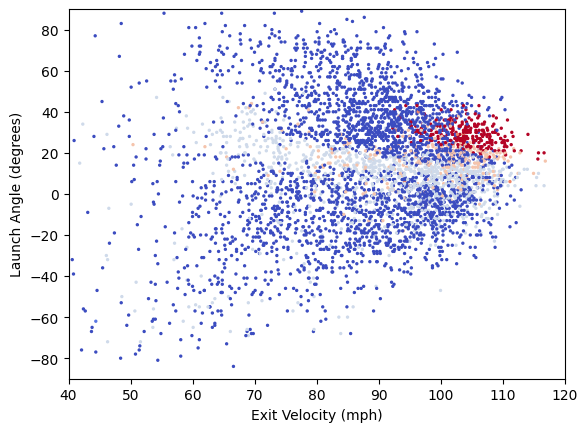

In [20]:
fig, ax = plt.subplots()
plt.scatter(x=bip_df["launch_speed"], y=bip_df["launch_angle"], c=bip_df["woba_value"], s=2, cmap="coolwarm")
ax.set_xlim(40,120)
ax.set_ylim(-90,90)
ax.set_xlabel("Exit Velocity (mph)")
ax.set_ylabel("Launch Angle (degrees)")
plt.show()



In [22]:
stat_df = statcast(start_dt="2023-09-01", end_dt="2023-09-08")


This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 23.46it/s]


In [23]:
stat_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3295,FF,2023-09-08,99.3,2.38,5.37,"Scott, Tanner",656941,656945,strikeout,swinging_strike,...,3,3,2,2,3,Strategic,Standard,148,-0.044,-0.09
3505,SL,2023-09-08,91.6,2.72,5.32,"Scott, Tanner",656941,656945,None,ball,...,3,3,2,2,3,Infield shade,Standard,267,0.0,0.016
3557,SL,2023-09-08,92.4,2.56,5.16,"Scott, Tanner",656941,656945,None,ball,...,3,3,2,2,3,Infield shade,Standard,270,0.0,0.009
3763,SL,2023-09-08,92.4,2.59,5.27,"Scott, Tanner",656941,656945,None,foul,...,3,3,2,2,3,Infield shade,Standard,271,0.0,-0.023
3871,FF,2023-09-08,99.5,2.41,5.52,"Scott, Tanner",656941,656945,None,called_strike,...,3,3,2,2,3,Standard,Standard,147,0.0,-0.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4198,FF,2023-09-01,88.3,-2.21,5.44,"Davies, Zach",683002,605200,None,ball,...,0,0,0,0,0,Infield shade,Standard,234,0.0,0.025
4223,CH,2023-09-01,79.0,-2.36,5.45,"Davies, Zach",668939,605200,field_out,hit_into_play,...,0,0,0,0,0,Infield shade,Standard,253,0.022,-0.173
4376,CH,2023-09-01,79.5,-2.29,5.56,"Davies, Zach",668939,605200,None,swinging_strike,...,0,0,0,0,0,Infield shade,Standard,249,0.0,-0.055
4500,FC,2023-09-01,87.0,-2.27,5.44,"Davies, Zach",668939,605200,None,ball,...,0,0,0,0,0,Infield shade,Standard,222,0.0,0.028


In [24]:
bip_df = stat_df[(pd.notnull(stat_df["bb_type"]))]
bip_df = bip_df.dropna(how="any", subset=["launch_speed", "launch_angle"])
list(set(bip_df["description"]))

['hit_into_play']

In [25]:
bip_df["ev_round"] = [round(ev) for ev in bip_df["launch_speed"]]
bip_df["la_round"] = [round(la) for la in bip_df["launch_angle"]]

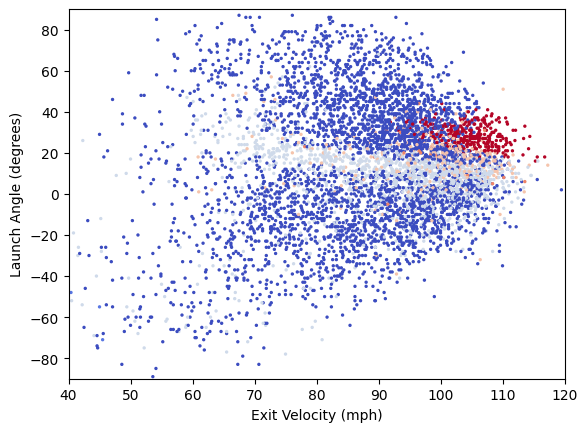

In [26]:
fig, ax = plt.subplots()
plt.scatter(x=bip_df["launch_speed"], y=bip_df["launch_angle"], c=bip_df["woba_value"], s=2, cmap="coolwarm")
ax.set_xlim(40,120)
ax.set_ylim(-90,90)
ax.set_xlabel("Exit Velocity (mph)")
ax.set_ylabel("Launch Angle (degrees)")
plt.show()


In [31]:
bip_df = stat_df[(pd.notnull(stat_df["bb_type"]))]
bip_df = bip_df.dropna(how="any", subset=["release_speed", "effective_speed"])
list(set(bip_df["description"]))

['hit_into_play']

In [29]:
stat_df = statcast(start_dt="2023-09-01", end_dt="2023-09-15")

This is a large query, it may take a moment to complete


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00,  8.19it/s]


In [30]:
stat_df = statcast(start_dt="2023-08-01", end_dt="2023-08-31")

This is a large query, it may take a moment to complete


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:02<00:00, 12.87it/s]


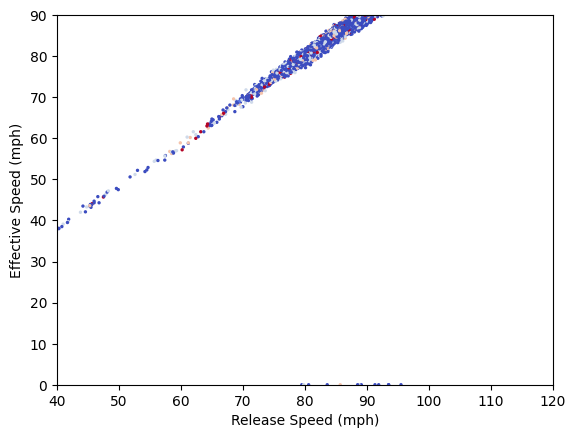

In [32]:
fig, ax = plt.subplots()
plt.scatter(x=bip_df["release_speed"], y=bip_df["effective_speed"], c=bip_df["woba_value"], s=2, cmap="coolwarm")
ax.set_xlim(40,120)
ax.set_ylim(0,90)
ax.set_xlabel("Release Speed (mph)")
ax.set_ylabel("Effective Speed (mph)")
plt.show()